<a href="https://colab.research.google.com/github/audalsgh/20250707/blob/main/0707_python_openCV_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🎉 OpenCV 버전: 4.11.0

🎨 테스트 1: 이미지 생성하기


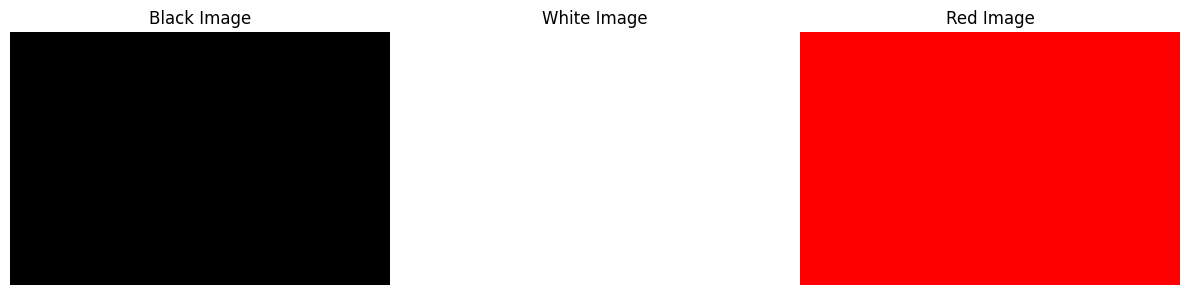

In [1]:
import cv2  # openCV 라이브러리
import numpy as np  # numpy 라이브러리를 불러오고, 별칭을 np로 함
import matplotlib.pyplot as plt  # matplotlib의 pyplot 모듈을 불러오고, 별칭을 plt로 함
from google.colab import files  # 코랩환경에서 파일 업로드, 다운로드를 할때 쓰이는 모듈
import io  # 파이썬 내장 모듈인 io는 메모리 내에서 파일 객체(바이트, 스트림 등)을 다룰때 쓰임. 업로드된 파일의 데이터를 메모리에서 바로 읽을 때 등.
from PIL import Image  # pillow 라이브러리의 image 클래스를 불러옴. 이미지 열기, 저장, 변환 등 이미지 작업에 쓰임.

print(f"🎉 OpenCV 버전: {cv2.__version__}")

# =============================================================================
# 📝 테스트 1: 간단한 이미지 생성하기
# =============================================================================

def test1_create_image():
    """간단한 이미지 만들어보기"""
    print("\n🎨 테스트 1: 이미지 생성하기")

    # 1. 빈 캔버스 만들기 (검은색)
    black_img = np.zeros((200, 300, 3), dtype=np.uint8)  #높이 200, 너비 300인 (BGR 3채널) 배열을 모두 0(검정)으로 초기화, dtype=np.uint8: 픽셀 값 범위 0–255

    # 2. 흰색 캔버스 만들기
    white_img = np.ones((200, 300, 3), dtype=np.uint8) * 255  #모든 원소가 1인 배열을 생성하려면, *255로 곱해 값 255(흰색)로 변환

    # 3. 빨간색 캔버스 만들기
    red_img = np.zeros((200, 300, 3), dtype=np.uint8)  # np.zeros()로 검은 그림을 먼저 만들고,
    red_img[:, :, 2] = 255  # red_img[:, :, 2] = 255: 채널 인덱스 2(R 채널)에만 255를 할당, 순수 빨강

    # 결과 출력
    plt.figure(figsize=(12, 4)) #가로 12인치, 세로 4인치 크기 캔버스 생성

    plt.subplot(1, 3, 1)
    plt.imshow(black_img)
    plt.title('Black Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(white_img)
    plt.title('White Image')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(red_img, cv2.COLOR_BGR2RGB))
    plt.title('Red Image')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# 함수 실행 코드 추가
if __name__ == "__main__":
    test1_create_image()


🔺 테스트 2: 도형 그리기


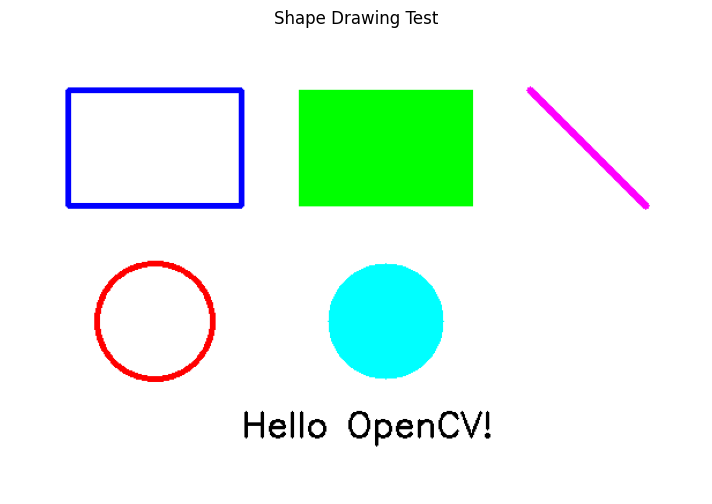

In [2]:
# =============================================================================
# 📝 테스트 2: 도형 그리기
# =============================================================================

def test2_draw_shapes():
    """도형 그리기 연습"""
    print("\n🔺 테스트 2: 도형 그리기")

    # 캔버스 생성
    canvas = np.ones((400, 600, 3), dtype=np.uint8) * 255

    # 1. 사각형 그리기
    cv2.rectangle(canvas, (50, 50), (200, 150), (255, 0, 0), 3)  # 파란색 테두리
    cv2.rectangle(canvas, (250, 50), (400, 150), (0, 255, 0), -1)  # 초록색 채우기

    # 2. 원 그리기
    cv2.circle(canvas, (125, 250), 50, (0, 0, 255), 3)  # 빨간색 테두리
    cv2.circle(canvas, (325, 250), 50, (255, 255, 0), -1)  # 노란색 채우기

    # 3. 직선 그리기
    cv2.line(canvas, (450, 50), (550, 150), (255, 0, 255), 5)  # 보라색 선

    # 4. 텍스트 쓰기
    cv2.putText(canvas, 'Hello OpenCV!', (200, 350),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)

    # 결과 출력
    plt.figure(figsize=(10, 6))
    plt.imshow(cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB))
    plt.title('Shape Drawing Test')
    plt.axis('off')
    plt.show()

# 함수 실행 코드 추가
if __name__ == "__main__":
    test2_draw_shapes()


🌈 테스트 3: 색상 변환


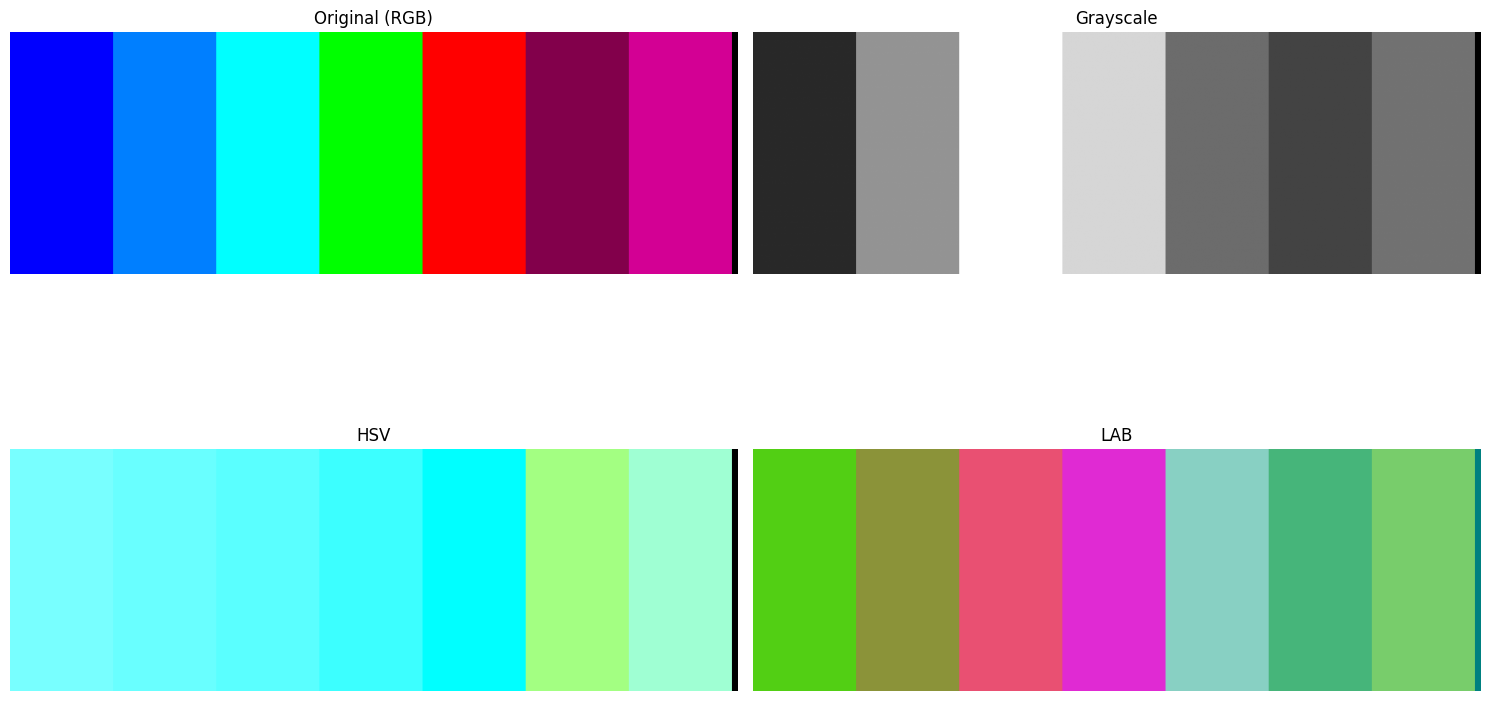

In [3]:
# =============================================================================
# 📝 테스트 3: 색상 변환
# =============================================================================

def test3_color_conversion():
    """색상 변환 테스트"""
    print("\n🌈 테스트 3: 색상 변환")

    # 컬러 이미지 생성 (무지개 패턴)
    img = np.zeros((200, 600, 3), dtype=np.uint8)

    # 무지개 색상 만들기
    colors = [
        (255, 0, 0),    # 빨강
        (255, 127, 0),  # 주황
        (255, 255, 0),  # 노랑
        (0, 255, 0),    # 초록
        (0, 0, 255),    # 파랑
        (75, 0, 130),   # 남색
        (148, 0, 211)   # 보라
    ]

    # 각 색상을 세로 띠로 만들기
    strip_width = 600 // len(colors)
    for i, color in enumerate(colors):
        x_start = i * strip_width
        x_end = (i + 1) * strip_width
        img[:, x_start:x_end] = color

    # 다양한 색공간으로 변환
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

    # 결과 출력
    plt.figure(figsize=(15, 10))

    plt.subplot(2, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original (RGB)')
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.imshow(gray, cmap='gray')
    plt.title('Grayscale')
    plt.axis('off')

    plt.subplot(2, 2, 3)
    plt.imshow(hsv)
    plt.title('HSV')
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.imshow(lab)
    plt.title('LAB')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# 함수 실행 코드 추가
if __name__ == "__main__":
    test3_color_conversion()


🔍 테스트 4: 이미지 필터링


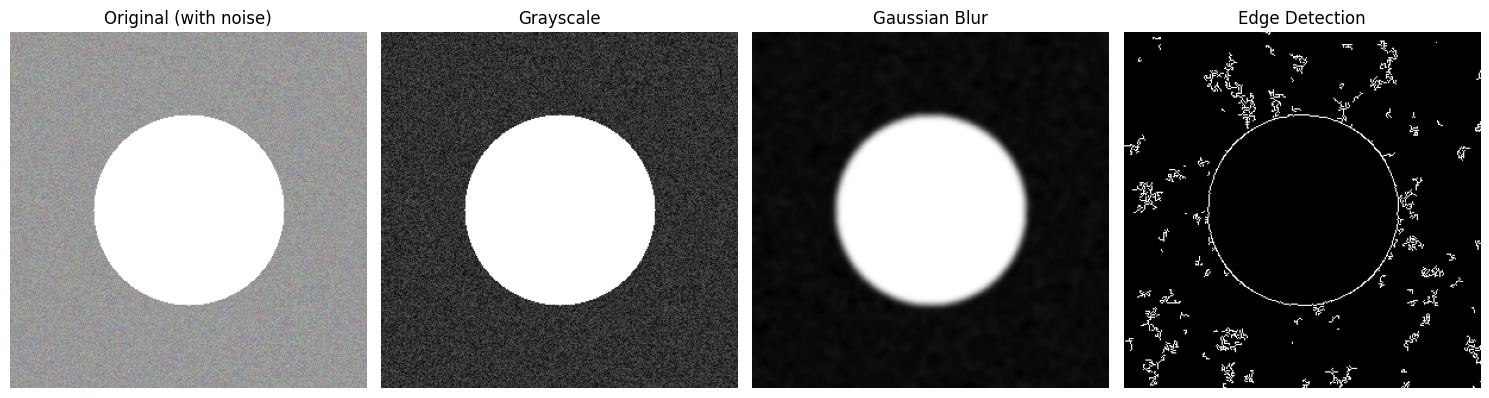

In [4]:
# =============================================================================
# 📝 테스트 4: 이미지 필터링
# =============================================================================

def test4_image_filtering():
    """이미지 필터링 테스트"""
    print("\n🔍 테스트 4: 이미지 필터링")

    # 노이즈가 있는 이미지 생성
    img = np.ones((300, 300, 3), dtype=np.uint8) * 128  # 회색 배경

    # 원 그리기
    cv2.circle(img, (150, 150), 80, (255, 255, 255), -1)

    # 노이즈 추가
    noise = np.random.randint(0, 50, img.shape, dtype=np.uint8)
    noisy_img = cv2.add(img, noise)

    # 흑백 변환
    gray = cv2.cvtColor(noisy_img, cv2.COLOR_BGR2GRAY)

    # 다양한 필터 적용
    blurred = cv2.GaussianBlur(gray, (15, 15), 0)
    edges = cv2.Canny(gray, 50, 150)

    # 결과 출력
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 4, 1)
    plt.imshow(cv2.cvtColor(noisy_img, cv2.COLOR_BGR2RGB))
    plt.title('Original (with noise)')
    plt.axis('off')

    plt.subplot(1, 4, 2)
    plt.imshow(gray, cmap='gray')
    plt.title('Grayscale')
    plt.axis('off')

    plt.subplot(1, 4, 3)
    plt.imshow(blurred, cmap='gray')
    plt.title('Gaussian Blur')
    plt.axis('off')

    plt.subplot(1, 4, 4)
    plt.imshow(edges, cmap='gray')
    plt.title('Edge Detection')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# 함수 실행 코드 추가
if __name__ == "__main__":
    test4_image_filtering()


📁 테스트 5: 이미지 업로드 및 처리
이미지 파일을 업로드하세요...


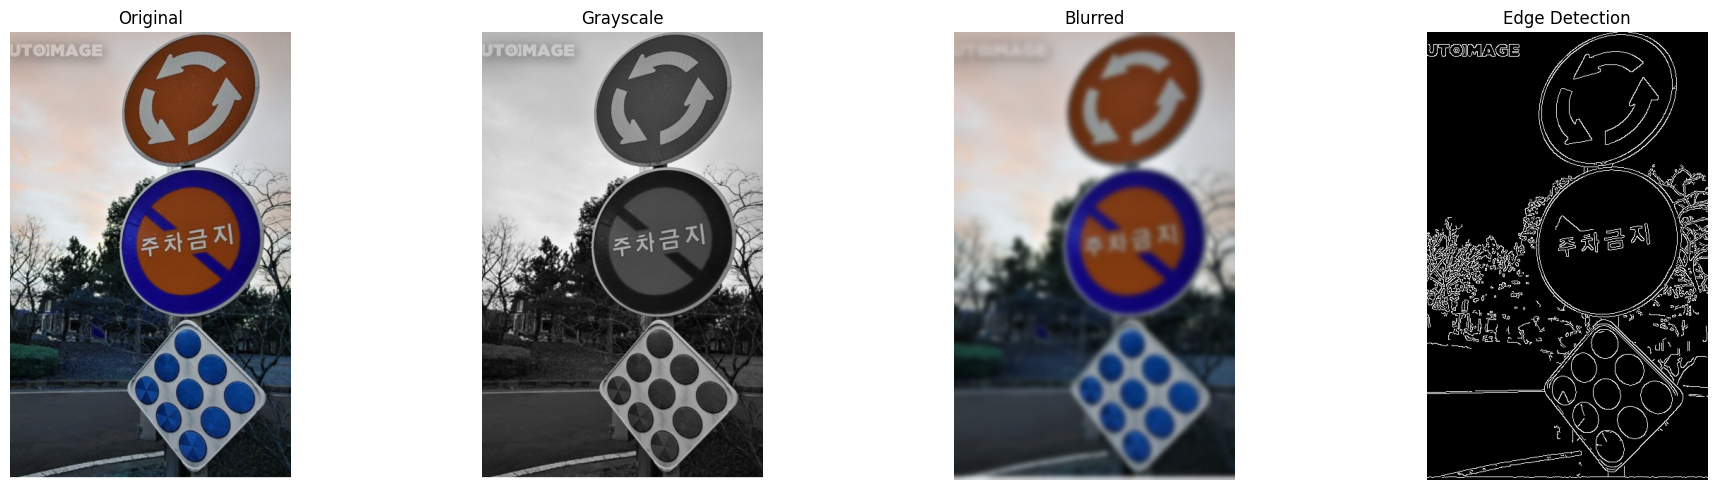

✅ 이미지 처리 완료! 크기: (636, 398, 3)


In [14]:
# =============================================================================
# 📝 테스트 5: 이미지 업로드 및 처리 (선택사항)
# =============================================================================

def test5_upload_and_process():
    """이미지 업로드하고 처리하기 (선택사항)"""
    print("\n📁 테스트 5: 이미지 업로드 및 처리")
    print("이미지 파일을 업로드하세요...")

    try:
        """ # 파일 업로드 방법1
        uploaded = files.upload()

        if uploaded:
            filename = list(uploaded.keys())[0]

            # 이미지 읽기
            image_data = uploaded[filename]
            img = Image.open(io.BytesIO(image_data))
            img_array = np.array(img)
        """

        # 파일 업로드 방법2 files.upload() 대신 직접 경로 읽기로 변경
        img_path = '/content/sample_data/image_traffic_sign.png'
        # OpenCV로 읽으면 BGR ndarray가 들어옴, uploaded 변수를 dict 형태로 맞추기 위해 포장
        img_bgr = cv2.imread(img_path)
        if img_bgr is None:
            raise FileNotFoundError(f"파일을 찾을 수 없습니다: {img_path}")
        # 기존 코드에서 uploaded[filename] 으로 이미지 데이터를 꺼내 쓰기 때문에 dict 형식으로 변환
        uploaded = { img_path.split('/')[-1]: img_bgr }

        if uploaded:
            filename = list(uploaded.keys())[0]

            # 이미지 읽기
            img_array = uploaded[filename]

            # RGB → BGR 변환 (OpenCV용)
            if len(img_array.shape) == 3:
                img_bgr = cv2.cvtColor(img_array, cv2.COLOR_RGB2BGR)
            else:
                img_bgr = img_array

            # 크기 조정 (너무 큰 이미지 방지)
            height, width = img_bgr.shape[:2]
            if width > 800:
                scale = 800 / width
                new_width = 800
                new_height = int(height * scale)
                img_bgr = cv2.resize(img_bgr, (new_width, new_height))

            # 다양한 처리 적용
            gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
            blurred = cv2.GaussianBlur(img_bgr, (21, 21), 0)
            edges = cv2.Canny(gray, 100, 200)

            # 결과 출력
            plt.figure(figsize=(20, 5))

            plt.subplot(1, 4, 1)
            plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
            plt.title('Original')
            plt.axis('off')

            plt.subplot(1, 4, 2)
            plt.imshow(gray, cmap='gray')
            plt.title('Grayscale')
            plt.axis('off')

            plt.subplot(1, 4, 3)
            plt.imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB))
            plt.title('Blurred')
            plt.axis('off')

            plt.subplot(1, 4, 4)
            plt.imshow(edges, cmap='gray')
            plt.title('Edge Detection')
            plt.axis('off')

            plt.tight_layout()
            plt.show()

            print(f"✅ 이미지 처리 완료! 크기: {img_bgr.shape}")

    except Exception as e:
        print(f"❌ 업로드 중 오류: {e}")
        print("이 테스트는 건너뛰겠습니다.")

# 함수 실행 코드 추가
if __name__ == "__main__":
   test5_upload_and_process()